In [ ]:
library(Seurat)
library(dplyr)
library(Matrix)

Attaching SeuratObject


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [ ]:
data <- read.table("F:/SSL/EBI_normalized/E-GEOD-81547.norm.csv", header = TRUE, sep=",")

In [ ]:
head(data)

,SRR3562210,SRR3562211,SRR3562212,SRR3562213,SRR3562214,SRR3562215,SRR3562216,SRR3562217,SRR3562218,SRR3562219,...,SRR3564744,SRR3564745,SRR3564746,SRR3564747,SRR3564748,SRR3564749,SRR3564750,SRR3564751,SRR3564752,SRR3564753
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.930023,0.000000,223.5907,25.825342,0,3.341197,0.0000000,0.0000,0.00000,0.000000,...,0.00000,0.9678963,0.0000,0,0,0,0.000000,0.0000,22.69726,121.4509
2,0.000000,193.196910,0.0000,0.000000,0,0.000000,78.2341700,155.5834,0.00000,17.197102,...,0.00000,17.6484220,142.5856,0,0,0,0.000000,0.0000,0.00000,0.0000
3,3.075830,743.466060,0.0000,0.000000,0,0.000000,0.0000000,0.0000,0.00000,0.000000,...,0.00000,16.4463710,0.0000,0,0,0,1.490027,0.0000,0.00000,0.0000
4,9.751206,8.586529,0.0000,2.335857,0,2.809107,0.0000000,0.0000,9.32125,2.866184,...,22.19171,0.0000000,0.0000,0,0,0,0.000000,0.0000,3.71096,0.0000
5,0.000000,0.000000,0.0000,0.000000,0,0.000000,0.0000000,0.0000,0.00000,0.000000,...,0.00000,0.0000000,0.0000,0,0,0,0.000000,0.0000,0.00000,0.0000
6,0.000000,0.000000,0.0000,0.000000,0,1.404554,0.9903059,0.0000,0.00000,0.000000,...,0.00000,3.7818050,0.0000,0,0,0,0.000000,265.6294,0.00000,0.0000


In [ ]:
dim(data)

[1] 27828  2544

In [ ]:
mydata <- CreateSeuratObject(counts = data, project="EBI81547")

In [ ]:
mydata

An object of class Seurat 
27828 features across 2544 samples within 1 assay 
Active assay: RNA (27828 features, 0 variable features)

In [ ]:
mydata <- FindVariableFeatures(mydata)

In [ ]:
all.genes <- rownames(mydata)
mydata <- ScaleData(mydata, features = all.genes)

Centering and scaling data matrix



In [ ]:
mydata <- RunPCA(mydata, features = VariableFeatures(object = mydata))

PC_ 1 
Positive:  8786, 7877, 13206, 15543, 130, 11540, 6261, 14185, 12167, 14255 
	   16063, 2356, 1683, 10513, 9899, 10490, 14728, 15366, 14578, 13238 
	   499, 5965, 10075, 291, 9208, 7152, 14328, 12846, 3736, 448 
Negative:  18294, 16856, 9785, 9196, 7956, 10269, 1906, 13803, 26931, 11860 
	   11861, 11598, 13136, 11959, 7749, 12262, 15139, 7933, 10799, 259 
	   7160, 5918, 25819, 18031, 4299, 7035, 4145, 10533, 12248, 22999 
PC_ 2 
Positive:  12167, 10490, 16063, 14578, 14255, 3736, 12846, 685, 10793, 12361 
	   130, 10468, 448, 15366, 15871, 8297, 15412, 5277, 10515, 11540 
	   7152, 3282, 5965, 13802, 11003, 15557, 7936, 12063, 2786, 8009 
Negative:  4006, 6313, 4025, 6948, 1376, 295, 4514, 2185, 4491, 7880 
	   1146, 2113, 15196, 11312, 3203, 4634, 13195, 13664, 14185, 7883 
	   24627, 1699, 9899, 10518, 17069, 7502, 8005, 25610, 4102, 10258 
PC_ 3 
Positive:  7035, 7437, 10533, 17069, 24323, 13122, 15022, 9113, 6430, 4542 
	   11080, 16992, 5000, 7589, 6107, 1880, 8372, 421, 2

Check

In [ ]:
head(mydata)

,orig.ident,nCount_RNA,nFeature_RNA
,<fct>,<dbl>,<int>
SRR3562210,EBI81547,1000000.0,6028
SRR3562211,EBI81547,1000000.1,5910
SRR3562212,EBI81547,1000000.0,4830
SRR3562213,EBI81547,999999.9,7006
SRR3562214,EBI81547,1000000.0,4339
SRR3562215,EBI81547,1000000.1,7725
SRR3562216,EBI81547,1000000.0,6614
SRR3562217,EBI81547,1000000.0,4849
SRR3562218,EBI81547,1000000.0,4787


In [ ]:
temp <- as.matrix(GetAssayData(mydata, slot = "scale.data"))

In [ ]:
head(temp)

,SRR3562210,SRR3562211,SRR3562212,SRR3562213,SRR3562214,SRR3562215,SRR3562216,SRR3562217,SRR3562218,SRR3562219,...,SRR3564744,SRR3564745,SRR3564746,SRR3564747,SRR3564748,SRR3564749,SRR3564750,SRR3564751,SRR3564752,SRR3564753
1,-0.31475001,-0.32947270,1.37613195,-0.13247066,-0.32947270,-0.30398523,-0.32947270,-0.32947270,-0.32947270,-0.32947270,...,-0.32947270,-0.32208935,-0.32947270,-0.32947270,-0.32947270,-0.32947270,-0.32947270,-0.32947270,-0.15633247,0.59698479
2,-0.48165729,1.29581173,-0.48165729,-0.48165729,-0.48165729,-0.48165729,0.23812033,0.94975597,-0.48165729,-0.32343884,...,-0.48165729,-0.31928656,0.83017281,-0.48165729,-0.48165729,-0.48165729,-0.48165729,-0.48165729,-0.48165729,-0.48165729
3,-0.13727766,10.00000000,-0.20053030,-0.20053030,-0.20053030,-0.20053030,-0.20053030,-0.20053030,-0.20053030,-0.20053030,...,-0.20053030,0.13767967,-0.20053030,-0.20053030,-0.20053030,-0.20053030,-0.16988878,-0.20053030,-0.20053030,-0.20053030
4,0.10860582,0.07780978,-0.14923260,-0.08746858,-0.14923260,-0.07495504,-0.14923260,-0.14923260,0.09723705,-0.07344584,...,0.43755386,-0.14923260,-0.14923260,-0.14923260,-0.14923260,-0.14923260,-0.14923260,-0.14923260,-0.05110852,-0.14923260
5,-0.01989417,-0.01989417,-0.01989417,-0.01989417,-0.01989417,-0.01989417,-0.01989417,-0.01989417,-0.01989417,-0.01989417,...,-0.01989417,-0.01989417,-0.01989417,-0.01989417,-0.01989417,-0.01989417,-0.01989417,-0.01989417,-0.01989417,-0.01989417
6,-0.11886726,-0.11886726,-0.11886726,-0.11886726,-0.11886726,-0.10193988,-0.10693231,-0.11886726,-0.11886726,-0.11886726,...,-0.11886726,-0.07328976,-0.11886726,-0.11886726,-0.11886726,-0.11886726,-0.11886726,3.08244122,-0.11886726,-0.11886726


In [ ]:
write.csv(temp, 'F:/SSL/Results/seuratData81547.csv', row.names = FALSE)

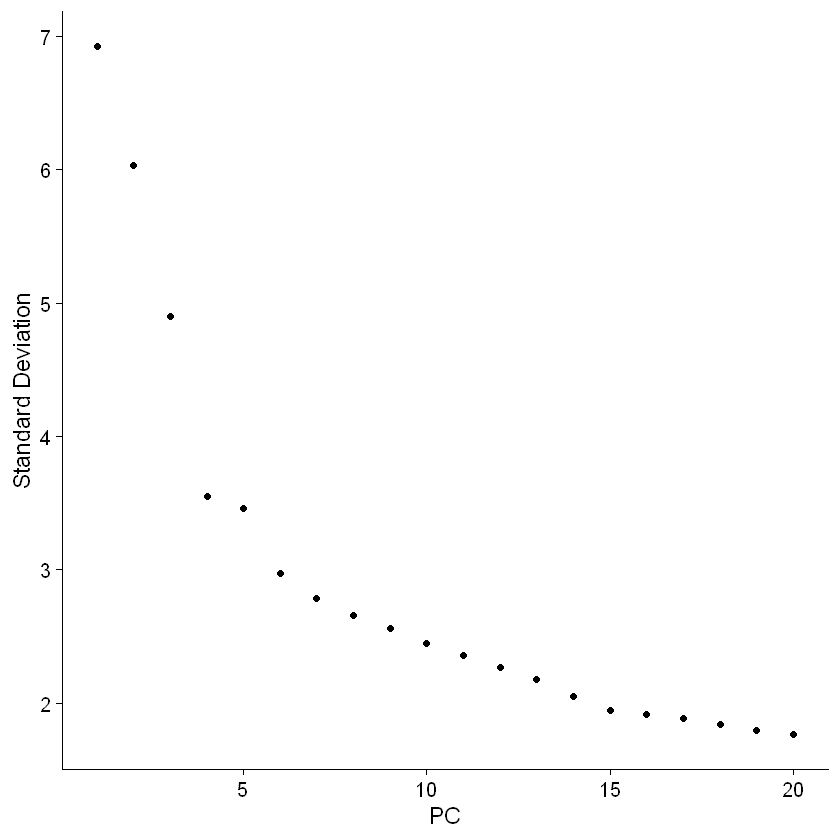

In [ ]:
ElbowPlot(mydata)

In [ ]:
mydata <- FindNeighbors(mydata, dims = 1:15)
mydata <- FindClusters(mydata, resolution = 0.5)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2544
Number of edges: 83907

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9275
Number of communities: 15
Elapsed time: 0 seconds


In [ ]:
pred_class <- mydata@meta.data['seurat_clusters']

In [ ]:
write.csv(pred_class, 'F:/SSL/Results/predClassSeurat81547.csv', row.names = FALSE)